# 911 Emergency Call Analysis

Emergency response services are vital for ensuring public safety, and analyzing 911 call data offers crucial insights into the patterns and trends of emergencies. This project aims to conduct an Exploratory Data Analysis (EDA) on a dataset of 911 emergency calls from Pennsylvania, with a particular focus on Montgomery County. By examining call frequency over time, the types of emergencies reported, and visualizing key trends, we seek to uncover critical statistics and identify patterns that can inform better resource allocation and response strategies.

The goal is to understand the dynamics of emergencies in Pennsylvania by studying patterns such as spikes in call volumes and exploring the reasons behind these patterns. Through this analysis, we aim to identify key trends and factors contributing to observed patterns, focusing on gaining insights into the underlying causes. This understanding will help in comprehending the nature of emergencies and the factors influencing them, ultimately providing a clearer picture of the data-driven factors at play.

## Materials
The data for this analysis will be sourced from Kaggle, a well-known platform where data science and analytics enthusiasts access a wide range of interesting datasets. Kaggle is widely used by professionals and hobbyists alike to find valuable data for various analytical and predictive tasks, making it an ideal resource for this project.
 
 Data source: [Kaggle](https://www.kaggle.com/mchirico/montcoalert)
 
 In this project, we will try to give answers to a set of questions that may be relevant when the 911 calls data sets:
 1. Identify the top 5 ZIP codes with the highest number of 911 calls in the dataset.
 2. Identify the dataset's top 5 townships with the highest number of 911 calls.
 3. Have there been any observable changes in the number of 911 calls that could indicate service improvements?
 



## Libraries Import 
Importing the libraries necessary for this project. We can add some aliases to make the libraries easier to use in our code.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

C:\Users\ujjwa\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Dataset Exploration
Let's read the data and look at the first 5 rows using the head method. The number of the output rows from the dataset is determined by the head method parameter. Let's look at the dataset size, feature names and their types.

In [2]:
df = pd.read_csv("911.csv")

In [3]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


### Attributes information 
The data contains the following fields:
* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB






The dataset includes several features, among which the 'zip' and 'twp' feature has some missing values. Since there's no reliable method to impute these missing values and the amount of missing data is relatively small, we will retain the column without making modifications. The dataset comprises:
1 integer feature (int64),
3 real-valued features (float64),
5 categorical features (object)

By keeping the features with missing values, we ensure the completeness of our dataset for potential future analyses that might benefit from this information.

In [5]:
# unique title codes
df['title'].nunique()

148

In the 'title' feature, the data starts with a category of call (EMS, Fire, Traffic). We will create a separate feature, 'Reason,' by using the .apply method to split it from the original 'title' feature.

In [6]:
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

In [7]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


We will use Seaborn to create a count plot that shows the distribution of how many calls took place for each category. Seaborn is a library built on top of Matplotlib that simplifies the process of creating complex visualizations with just a few lines of code. Additionally, all Matplotlib functions can be used in conjunction with Seaborn, allowing for further customization and enhancements.

In [8]:
# percentage share for each call reason
round((df['Reason'].value_counts()/len(df['Reason']))*100,1)

EMS        50.1
Traffic    34.7
Fire       15.2
Name: Reason, dtype: float64

<AxesSubplot:xlabel='Reason', ylabel='count'>

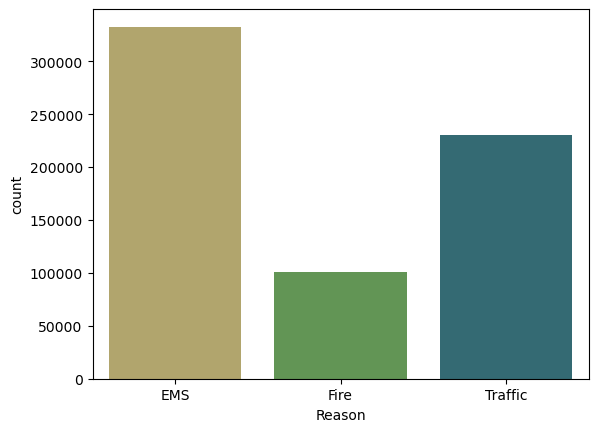

In [9]:
sns.countplot(x='Reason',data = df,palette = 'gist_earth_r')

From the count plot, it is evident that Emergency Medical Services (EMS) is the most common reason for 911 calls in Pennsylvania, accounting for 50.1% of all calls. This is followed by Traffic-related calls at 34.7%, and Fire-related calls at 15.2%.

Using the .info() method, we can observe that the 'timestamp' feature is currently of the 'object' data type. To analyze how call patterns change over time, we should convert this feature to the 'datetime' data type using the pd.to_datetime() method. By converting to 'datetime', we can easily access and analyze the time, day, date, and year separately, thereby simplifying our analysis.

In [10]:
# Turning the timeStamp column from string to datetime
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [11]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)

In [12]:
# gets the month from timestamp feature
df['Month'] = df['timeStamp'].apply(lambda time: time.month) 
# gets the day of week by getting the date 
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek) 

In [13]:
df['Day of Week'].unique() 

array([3, 4, 5, 6, 0, 1, 2], dtype=int64)

In [14]:
#Since the days are in numbers changing them to their names
dmap = {0: 'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
df['Day of Week'] = df['Day of Week'].map(dmap)

In [15]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,Thu


We will plot bar charts and heatmaps to examine the weekly and monthly patterns throughout the year for all categories of 911 calls. This analysis will help us identify trends and fluctuations in call volume for EMS, Fire, and Traffic-related incidents over the course of the weeks and months, providing a comprehensive view of how call patterns change over time.

We use the groupby method to group the data by the desired features and obtain counts. After grouping, we apply the unstack method on the multi-level index data to transform it into a matrix-like format, which is suitable for plotting a heatmap. Alternatively, we can use the pivot_table method to achieve a similar result.

<AxesSubplot:xlabel='Hour', ylabel='Day of Week'>

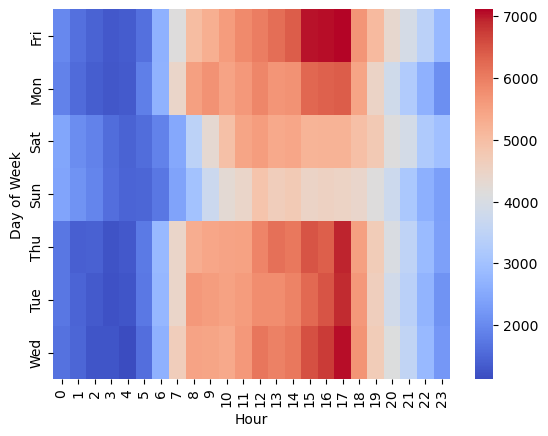

In [16]:
dayhr = df.groupby(by=['Day of Week','Hour']).count()['e'].unstack()
sns.heatmap(dayhr,cmap = 'coolwarm')

From the heatmap, it is evident that the majority of 911 calls occur during work hours. The frequency of calls is notably lower on weekends compared to weekdays, suggesting a pattern where call volumes peak during typical working hours and decrease during weekends.

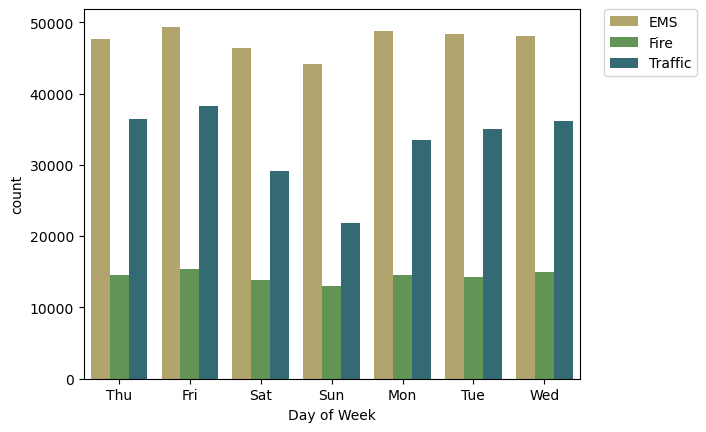

In [17]:
sns.countplot(x = 'Day of Week', data = df, hue = 'Reason',palette = 'gist_earth_r')
plt.legend(bbox_to_anchor = (1.05,1), loc = 2, borderaxespad=0.)

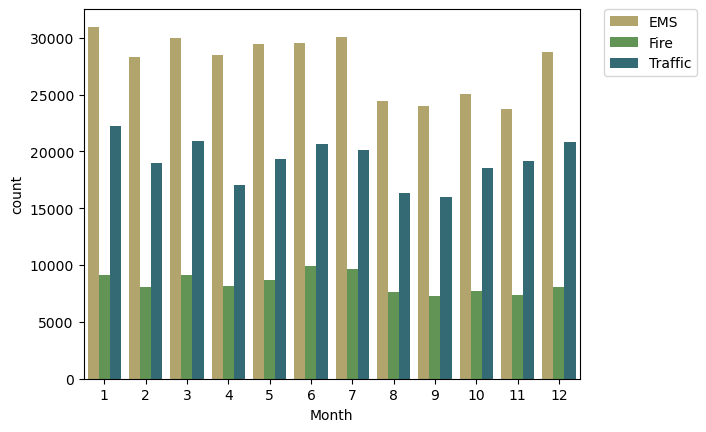

In [18]:
sns.countplot(x = 'Month', data = df, hue = 'Reason',palette = 'gist_earth_r')
plt.legend(bbox_to_anchor = (1.05,1), loc = 2, borderaxespad=0.)

From the next two count plots, it is evident that 911 calls peak at the beginning of the week, with traffic-related calls decreasing towards the weekend. A similar pattern is observed in the monthly count plot, where the number of calls gradually decreases as the year progresses and then increases again during the holiday season.

Next, we'll create a line chart for different years to determine if the observed patterns are consistent each year or if they are a result of aggregations. This will help us understand whether the trends we see are persistent over time or if they vary significantly from year to year.

In [19]:
df['Year'] = df['timeStamp'].apply(lambda time:time.year)

In [20]:
bymonth = df.groupby(['Year','Month']).count()

The resulting DataFrame will have hierarchical indexing, or multiple levels of indexing. To facilitate analysis, we can use the '.xs' method to specify a particular level of the index. For example, by specifying the level as 'year,' we can extract monthly counts for different years efficiently.

<AxesSubplot:xlabel='Month', ylabel='Year'>

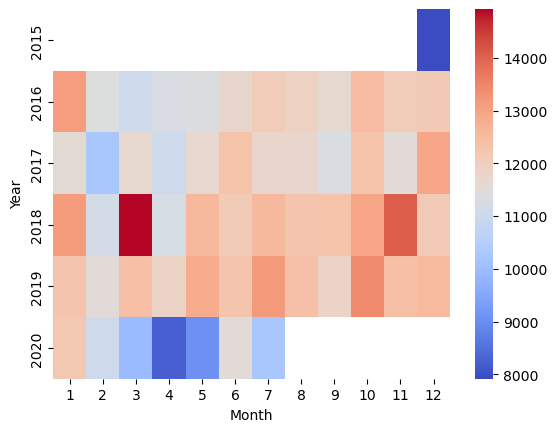

In [21]:
# using the dummy feature e to get counts
sns.heatmap(bymonth['e'].unstack(),cmap = 'coolwarm')

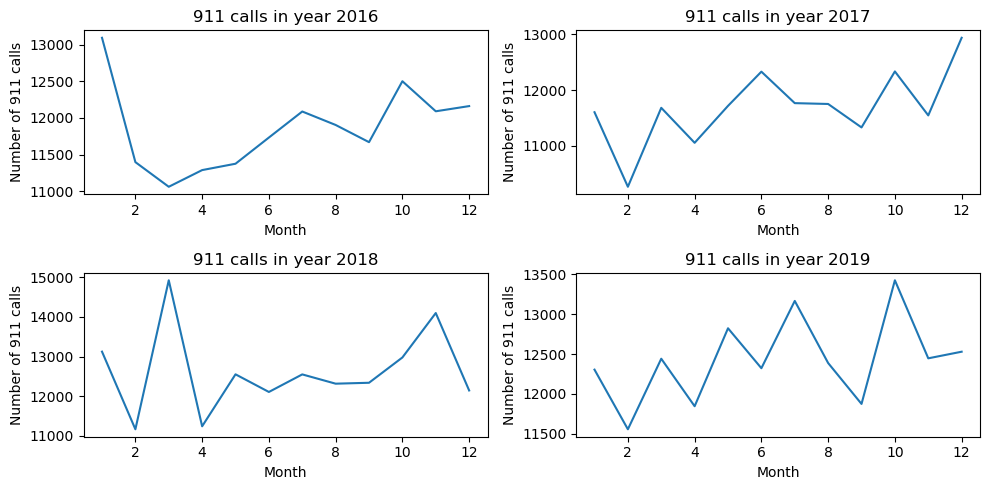

In [22]:
plt.figure(figsize = (10,5))
plot = 1
for i in range(2016,2020):
    plt.subplot(2,2,plot)
    bymonth.xs(i,level = 'Year')['e'].plot()
    plt.ylabel("Number of 911 calls")
    plt.title("911 calls in year "+str(i))
    plot+=1
plt.tight_layout()

**Note: I have removed the year 2015,2020 since only few months (1 month for 2015 and 3,4 months for 2020) of data was available**

From the subplot and heatmap, we observe that every year, except for 2018, shows a decline in calls at the beginning of the year, with a gradual increase towards the end. To further investigate whether these patterns are consistent across years, we can analyze daily call counts and then calculate the monthly and yearly averages. By comparing these means using ANOVA, followed by a post hoc analysis, we can determine which years exhibit similar patterns and which ones differ significantly.

Notably, in 2018, there was a substantial spike in calls in March, suggesting an unusual incident or event that may have contributed to this anomaly. Further investigation will be needed to understand the cause of this increase.


In [23]:
# getting dates from the timestamp feature
df['date'] = df['timeStamp'].apply(lambda t:t.date())

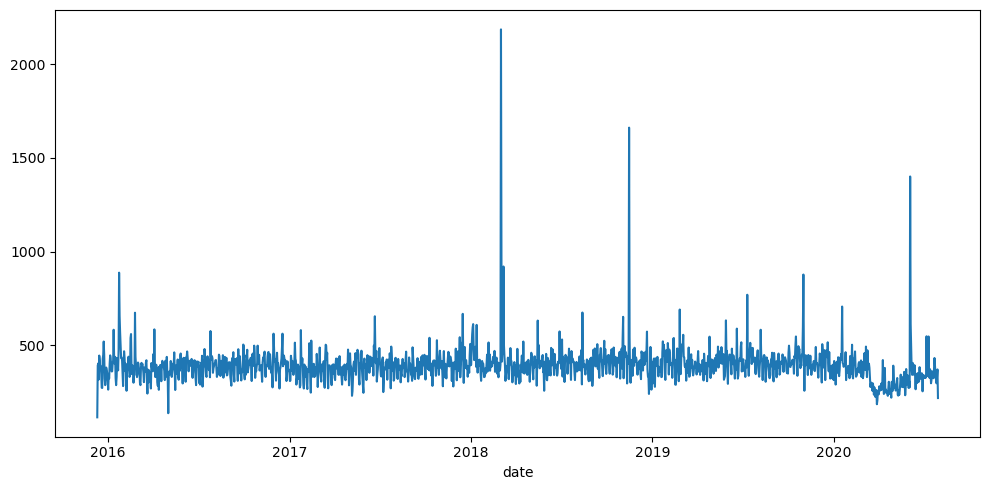

In [24]:
plt.figure(figsize=(10,5))
df.groupby('date').count()['lat'].plot()
plt.tight_layout()

Text(0.5, 1.0, 'EMS')

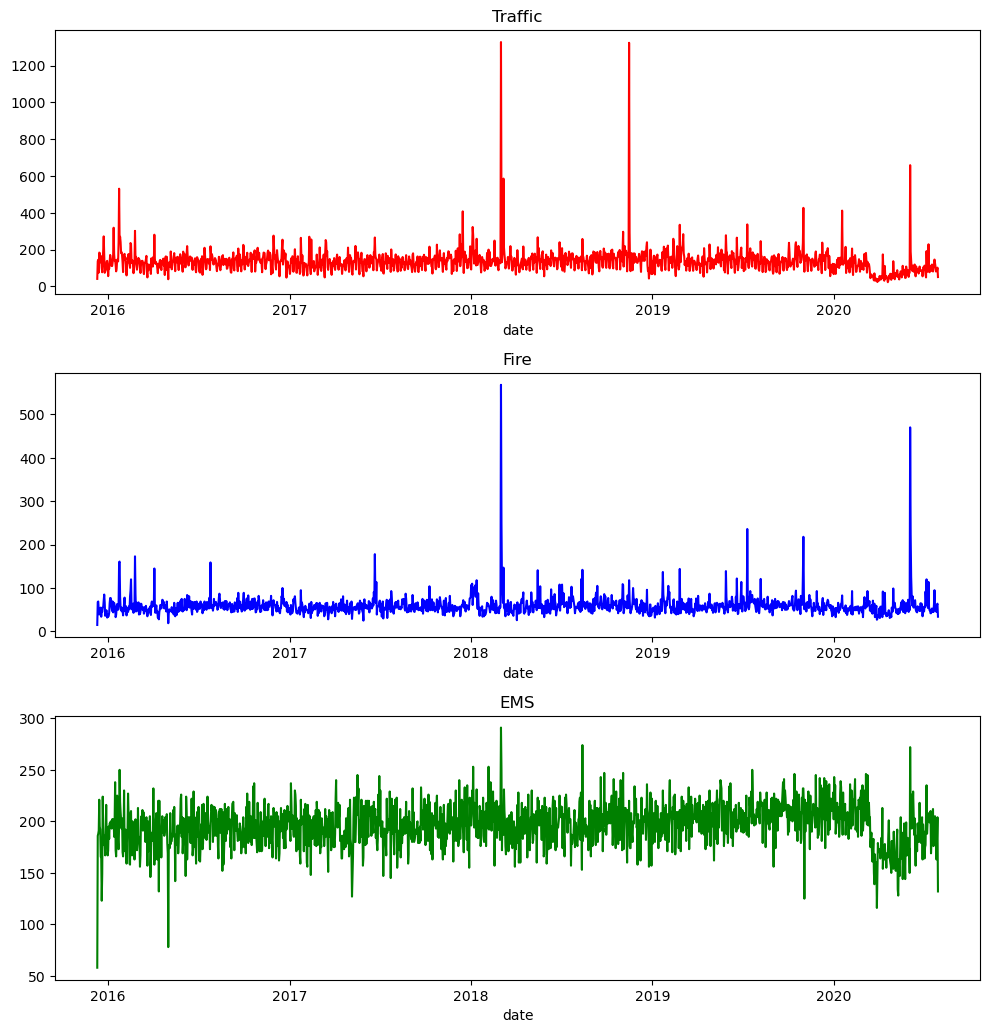

In [25]:
plt.figure(figsize=(10,10))
plt.subplot(3,1,1)
df[df['Reason']=='Traffic'].groupby('date').count()['lat'].plot(color = 'r')
plt.title("Traffic")


plt.subplot(3,1,2)
df[df['Reason']=='Fire'].groupby('date').count()['lat'].plot(color = 'b')
plt.title("Fire")
plt.tight_layout()

plt.subplot(3,1,3)
df[df['Reason']=='EMS'].groupby('date').count()['lat'].plot(color = 'g')
plt.title("EMS")

From the plots above, we can observe an increase in both traffic and fire-related calls in March 2018, as well as an increase in traffic-related calls at the end of the year. Additionally, there was a spike in calls in November. We also see a spike in fire and traffic-related calls in 2020. To understand these patterns better, we should examine the specific dates and townships where these calls occurred.

In [26]:
print(df[(df['Year']==2018) & (df['Month']==3)]['date'].value_counts().head())
print("")
print(df[(df['Year']==2018) & (df['Month']==11)]['date'].value_counts().head())
print("")
df[(df['Year']==2020)]['date'].value_counts().head()

2018-03-02    2187
2018-03-07     920
2018-03-03     917
2018-03-08     499
2018-03-05     484
Name: date, dtype: int64

2018-11-15    1662
2018-11-03     651
2018-11-16     544
2018-11-02     534
2018-11-06     495
Name: date, dtype: int64



2020-06-03    1401
2020-01-18     706
2020-06-04     613
2020-07-06     547
2020-07-10     546
Name: date, dtype: int64

In [27]:
print(df[(df['Year']==2018) & (df['Month']==3)]['twp'].value_counts())
print("")
print(df[(df['Year']==2018) & (df['Month']==11)]['twp'].value_counts())
print("")
df[(df['Year']==2020) & (df['Month']==6)]['twp'].value_counts().head()


LOWER MERION     1446
ABINGTON         1071
UPPER MERION      740
CHELTENHAM        724
NORRISTOWN        637
                 ... 
SCHWENKSVILLE      16
BERKS COUNTY       15
GREEN LANE         12
LEHIGH COUNTY       3
PHILA COUNTY        2
Name: twp, Length: 68, dtype: int64

LOWER MERION     1218
ABINGTON          811
UPPER MERION      800
NORRISTOWN        684
CHELTENHAM        665
                 ... 
SCHWENKSVILLE      27
HATFIELD BORO      18
LEHIGH COUNTY      14
GREEN LANE          6
PHILA COUNTY        4
Name: twp, Length: 68, dtype: int64



LOWER MERION    922
NORRISTOWN      744
ABINGTON        685
POTTSTOWN       574
UPPER MERION    574
Name: twp, dtype: int64

In [28]:
print(round((2187/df[(df['Year']==2018) & (df['Month']==3)]['date'].value_counts().sum())*100,1))

print("")

print(round((1662/df[(df['Year']==2018) & (df['Month']==11)]['date'].value_counts().sum())*100,1))

print("")
print(round((1401/df[(df['Year']==2020) & (df['Month']==6)]['date'].value_counts().sum())*100,1))

14.7

11.8

12.1


We observed that 14.7% of the calls in March occurred on March 2nd, primarily in townships such as Upper Merion, Lower Merion, and Abington, all located in Montgomery County near Philadelphia. Further investigation revealed that this spike in calls was due to a storm in the area, as mentioned in a [video](https://www.youtube.com/watch?v=olFX84DukxI) from the [Montgomery County Fire and Rescue Service (MCRFS)](https://www.montgomerycountymd.gov/mcfrs/). The storm caused trees to fall on houses and break power lines, leading to fires and a significant increase in 911 calls, even during the night.

Similarly, on November 15th, there was a notable increase, with 11.8% of the total calls for the month occurring on that day. However, despite further investigation, I could not identify any specific reasons for the spike in traffic-related calls. This increase might be due to an error in the records or could simply be a coincidence without any underlying incident or pattern.

On June 3rd, 2020, 12.1% of the 911 calls occurred, predominantly for fires. After some research, I found the [annual report](https://www.montgomerycountymd.gov/mcfrs/Resources/Files/annual-reports/2020-MCFRS-annual-report.pdf) from the [Montgomery County Fire and Rescue Service (MCRFS)](https://www.montgomerycountymd.gov/mcfrs/), but it does not mention any notable increase in calls during June. This lack of documentation suggests that the spike in calls on this date might be an error or another coincidence, similar to the incident on November 15th, 2018. 

## Question 1:
Identify the top 5 ZIP codes with the highest number of 911 calls in the dataset.

Text(0, 0.5, 'Count')

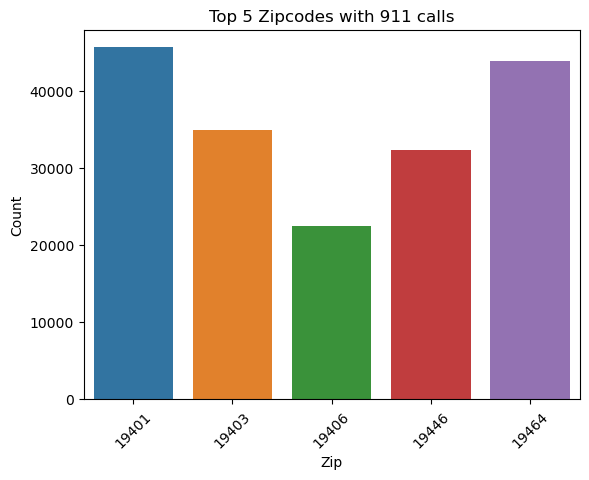

In [29]:
# Top 5 zipcodes for 911 calls
val = df['zip'].value_counts().head()
zips = val.reset_index()
zips.columns = ['Zip','Count']
zips['Zip'] = zips['Zip'].apply(int)
sns.barplot(x='Zip', y='Count', data=zips)
plt.title('Top 5 Zipcodes with 911 calls')
plt.xlabel('Zip')
plt.xticks(rotation = 45)
plt.ylabel('Count')

## Question 2
Identify the top 5 townships with the highest number of 911 calls in the dataset.

Text(0, 0.5, 'Count')

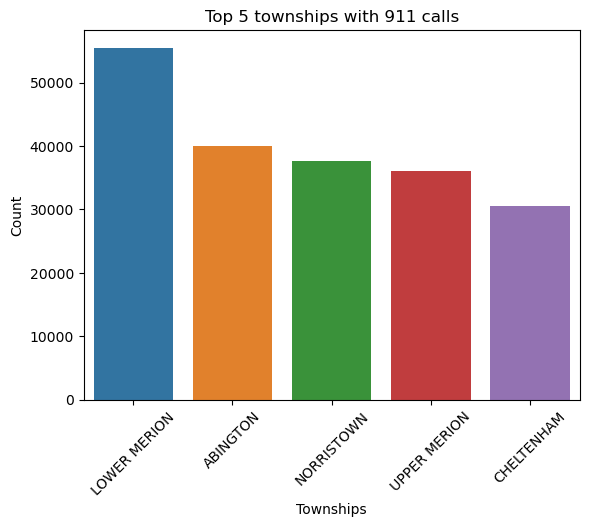

In [30]:
#Top 5 townships
val = df['twp'].value_counts().head()
twp = val.reset_index()
twp.columns = ['Twonships', 'Count']


sns.barplot(x='Twonships', y='Count', data=twp)
plt.title('Top 5 townships with 911 calls')
plt.xlabel('Townships')
plt.xticks(rotation = 45)
plt.ylabel('Count')

## Question 3: 
Have there been any observable changes in the number of 911 calls that could indicate improvements in services?

Text(0.5, 1.0, 'EMS')

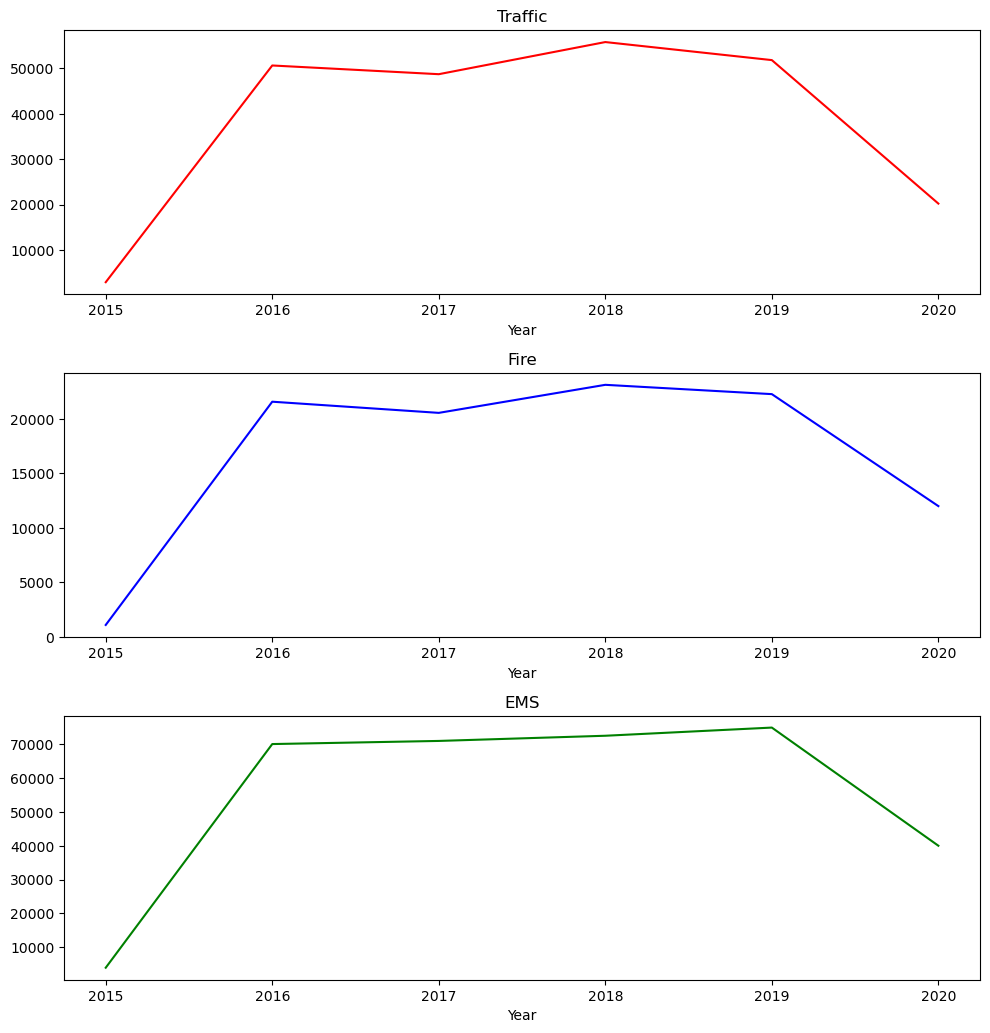

In [31]:
plt.figure(figsize=(10,10))
plt.subplot(3,1,1)
df[df['Reason']=='Traffic'].groupby('Year').count()['lat'].plot(color = 'r')
plt.title("Traffic")


plt.subplot(3,1,2)
df[df['Reason']=='Fire'].groupby('Year').count()['lat'].plot(color = 'b')
plt.title("Fire")
plt.tight_layout()

plt.subplot(3,1,3)
df[df['Reason']=='EMS'].groupby('Year').count()['lat'].plot(color = 'g')
plt.title("EMS")

From the above plot, it is evident that the number of 911 calls has remained relatively consistent over the past five years. It is important to note that 2015 and 2020 have less data compared to the other years, which explains the apparent drop in the chart for these years.